## Importing necessary dependencies

In [7]:
import pandas as pd  
import matplotlib.pyplot as plt
import re
import nltk
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

## Data Collection and Preparation

In [8]:
# Reading a CSV File 
df = pd.read_csv('./datasets/twitter_data.csv', encoding = 'latin', header = None)
df.head(20)

,0,1,2,3,4,5
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
5,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
6,0,1467811592,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,mybirch,Need a hug
7,0,1467811594,Mon Apr 06 22:20:03 PDT 2009,NO_QUERY,coZZ,@LOLTrish hey long time no see! Yes.. Rains a...
8,0,1467811795,Mon Apr 06 22:20:05 PDT 2009,NO_QUERY,2Hood4Hollywood,@Tatiana_K nope they didn't have it
9,0,1467812025,Mon Apr 06 22:20:09 PDT 2009,NO_QUERY,mimismo,@twittera que me muera ?


In [9]:
# Naming the Columns
df.columns = ['sentiment', 'id', 'date', 'query', 'user_id', 'text']

# Dropping Irrelevant Columns
df = df.drop(['id', 'date', 'query', 'user_id'], axis = 1)

# Replacing the column values with new values
df['sentiment'] = df['sentiment'].replace({0:'Negative', 4:'Positive'})
df.head(20)

,sentiment,text
0,Negative,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,Negative,is upset that he can't update his Facebook by ...
2,Negative,@Kenichan I dived many times for the ball. Man...
3,Negative,my whole body feels itchy and like its on fire
4,Negative,"@nationwideclass no, it's not behaving at all...."
5,Negative,@Kwesidei not the whole crew
6,Negative,Need a hug
7,Negative,@LOLTrish hey long time no see! Yes.. Rains a...
8,Negative,@Tatiana_K nope they didn't have it
9,Negative,@twittera que me muera ?


## Exploratory Data Analysis (EDA)

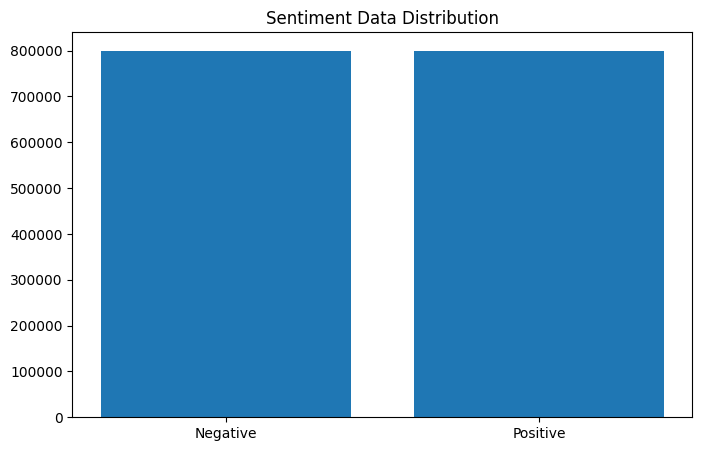

In [10]:
# Plotting Graph for Sentiments

counts = df['sentiment'].value_counts()

plt.figure(figsize=(8,5))

plt.bar(counts.index, counts.values)

plt.title('Sentiment Data Distribution')

plt.show()

## Data Preprocessing

In [11]:
# Preprocessing the Text

# It is pre-trained tokenizer for tokenizing words or sentences
nltk.download('punkt')

# collecting "English" Stop Words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# for WordNetLemmatizer() wornet is essential
nltk.download('wordnet')
lemmatizer = WordNetLemmatizer()


stemmer = PorterStemmer()

def preprocess_text(text):

    # lowercase the text 
    text = text.lower()

    # removing @user handle
    text = re.sub(r'\@\S+','',text)

    # removing any link present
    text = re.sub(r'http:\/\/\S+|https:\/\/\S+|www.[^ ]','',text)

    # removing any alpha numeric character present
    text = re.sub(r'[^\w\s]','',text)

    # replacing multiple white space character with single whitespace
    text = re.sub(r'\s+',' ',text)

    # removing any single letter present
    text = re.sub(r'\b\w\b','',text)

    clean_text = ''

    tokens = word_tokenize(text)

    for token in tokens:

        if token not in stop_words:

            stem_word = stemmer.stem(token)  # eating -> eat but ate -> eat not possible

            lemm_word = lemmatizer.lemmatize(stem_word, pos='v') # ate -> eat possible

            clean_text += (lemm_word+' ')
            
    return clean_text


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\SUMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\SUMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\SUMIT\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
# Applying Preprocessing Function on the text
df['text'] = df['text'].apply(preprocess_text)
df.head(20)

,sentiment,text
0,Negative,awww that bummer shoulda get david carr third ...
1,Negative,upset cant updat facebook text might cri resul...
2,Negative,dive mani time ball manag save 50 rest go bind
3,Negative,whole bodi feel itchi like fire
4,Negative,behav im mad cant see
5,Negative,whole crew
6,Negative,need hug
7,Negative,hey long time see ye rain bite bite lol im fin...
8,Negative,nope didnt
9,Negative,que muera


## Data Visualization

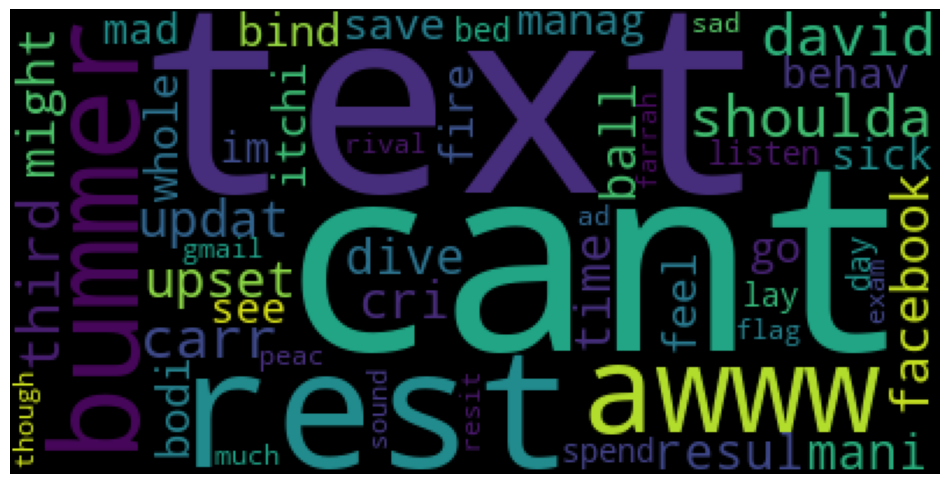

In [13]:
# Generating Negative Text Word Cloud

negative_text = df.loc[df['sentiment'] == 'Negative']['text']

neg_wordcloud = WordCloud(background_color='black', max_words=50).generate(str(negative_text))

plt.figure(figsize=(12,8))

plt.imshow(neg_wordcloud)

plt.axis('off')

plt.show()

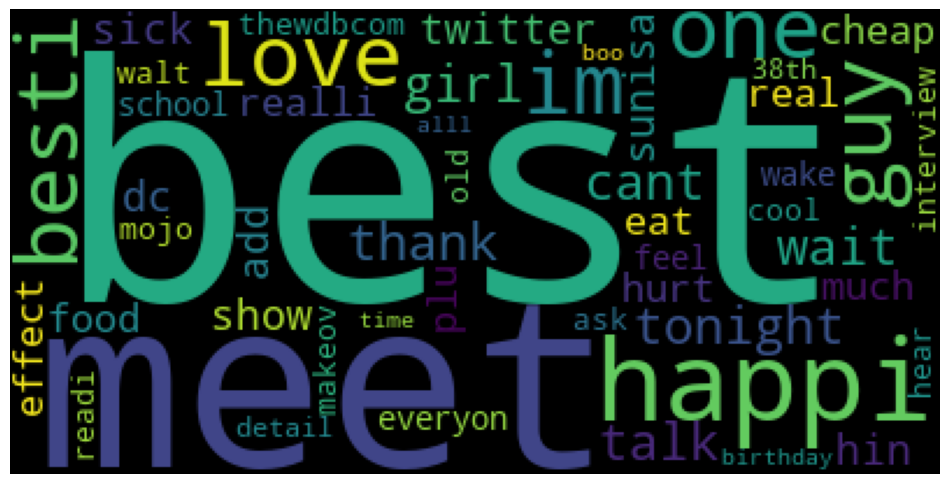

In [14]:
# Generating Positive Text Word Cloud


positive_text = df.loc[df['sentiment'] == 'Positive']['text']

pos_wordcloud = WordCloud(background_color='black',max_words=50).generate(str(positive_text))

plt.figure(figsize=(12,8))

plt.imshow(pos_wordcloud)

plt.axis('off')

plt.show()

In [15]:
# Shuffling the data randomly (random_state = 42 data will be shuffle in the same order)

df = df.sample(frac=1, random_state=42)
df.head(20)

,sentiment,text
541200,Negative,ahhh hope ok
750,Negative,cool tweet app razr
766711,Negative,know famili drama lamehey next time hang kim g...
285055,Negative,school email wont open geographi stuff revis s...
705995,Negative,upper airway problem
379611,Negative,go miss pastor sermon faith
1189018,Positive,lunchdj come eat
667030,Negative,oh feel like
93541,Negative,gahh noopeyton need livethi horribl
1097326,Positive,thank glad like product review bite site enjoy...


## Text Representation

In [16]:
# Feature Extraction

vectorizer = TfidfVectorizer()

X_vector  = vectorizer.fit_transform(df['text'])


In [17]:
# Splitting the data

X_train, X_test, Y_train, Y_test  = train_test_split(X_vector, df['sentiment'].values, test_size=0.2, random_state=42)

## Text Classification

In [18]:
# Training the Classification Model -> LogisticRegression

import warnings
warnings.filterwarnings("ignore")

model = LogisticRegression()

model.fit(X_train, Y_train)

LogisticRegression()

In [19]:
Y_pred = model.predict(X_test)

In [20]:
# Training the Model -> Naive Bayes MultinomialNB

second_model = MultinomialNB()

second_model.fit(X_train, Y_train)

MultinomialNB()

In [21]:
y_pred = second_model.predict(X_test)

## Classification Report and Accuracy

In [22]:
# Calucalate Accuracy for Logistic Regression

accuracy = accuracy_score(Y_pred, Y_test)

print(f'Accuracy: {accuracy}')

print('Classification Report:\n', classification_report(Y_pred, Y_test))


Accuracy: 0.77688125
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.77    153219
    Positive       0.80      0.77      0.78    166781

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



In [23]:
# Calculate Accuaracy for Naive Bayes MultinomialNB

accuracy = accuracy_score(y_pred, Y_test)

print(f'Accuracy: {accuracy}')

print('Classification Report:\n', classification_report(Y_pred, Y_test))

Accuracy: 0.757990625
Classification Report:
               precision    recall  f1-score   support

    Negative       0.76      0.79      0.77    153219
    Positive       0.80      0.77      0.78    166781

    accuracy                           0.78    320000
   macro avg       0.78      0.78      0.78    320000
weighted avg       0.78      0.78      0.78    320000



## Downloading Model and Vectorizer

In [24]:
import pickle

container = {
    'vectorizer': vectorizer,
    'model': model
}

with open('./ts_model.pkl','wb') as file:
    pickle.dump(container, file)
